In [161]:
import networkx as nx
from dom_mis import generate_graph_from_similarity_matrix
import pandas as pd
from pyvis.network import Network
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
colors = {
 'BBOB':'green',
    'CEC2013':'red',
    'CEC2014':'blue',
    'CEC2015':'purple',
    'CEC2017': 'pink'
}

In [84]:
def transform_node_label(node_as_tuple):
    return '_'.join([str(y).upper() for y in node_as_tuple])

In [85]:
def plot_graph(similarity_threshold):
    G = generate_graph_from_similarity_matrix(similarity_threshold)
    
    graph_to_plot = nx.relabel_nodes(G,transform_node_label)
    save_file = f'{similarity_threshold}.html'
    title = f''
    nt = Network("800px", "100%")
    for n in graph_to_plot.nodes():
        nt.add_node(n, color=colors[n.split('_')[0]])

    for e in graph_to_plot.edges():
        nt.add_edge(e[0],e[1],color='grey')
    nt.heading = title
    nt.show_buttons(filter_=['physics', 'nodes', 'edges', 'selection', 'layout'])
    nt.show(f'graph_visualizations/{save_file}')

In [86]:
def plot_graph_algorithm_results(similarity_threshold):
    G = generate_graph_from_similarity_matrix(similarity_threshold)
    dominant_results, mis_results = [pd.read_csv(os.path.join('results','dropna',alg,f'{similarity_threshold}_{0}.csv'), index_col=[0]) for alg in ['dominant','mis']]
    dominant_results = [transform_node_label(x) for x in dominant_results.values]
    print(dominant_results)
    mis_results = [transform_node_label(x) for x in mis_results.values]
    
    for algorithm, algorithm_results in [('dominant', dominant_results),('mis',mis_results)]:
        graph_to_plot = nx.relabel_nodes(G,transform_node_label)
        save_file = f'{algorithm}_{similarity_threshold}.html'
        title = f''
        nt = Network("800px", "100%")
        for n in graph_to_plot.nodes():
            is_node_selected = n in algorithm_results
            nt.add_node(n, 
                        color='red' if is_node_selected else 'black', 
                        size=40 if is_node_selected else 20 )

        for e in graph_to_plot.edges():
            nt.add_edge(e[0],e[1],color='grey')
        nt.heading = title
        nt.show_buttons(filter_=['physics','nodes', 'edges', 'selection', 'layout'])
        nt.show(f'graph_visualizations/{save_file}')

In [93]:
default_edge_color='grey'
default_node_color='lightskyblue'

In [149]:
def plot_graph_algorithm_results_from_both_algorithms(similarity_threshold):
    #G = generate_graph_from_similarity_matrix(similarity_threshold)
    graph_file_name=f'graphs/graph_{similarity_threshold}_dropna_adj'
    G = nx.read_adjlist(graph_file_name)
    
    for algorithm_run in range(0,4):
        dominant_results, mis_results = [pd.read_csv(os.path.join('results','dropna',alg,f'{similarity_threshold}_{algorithm_run}.csv'), index_col=[0]) for alg in ['dominant','mis']]
        dominant_results = [transform_node_label(x) for x in dominant_results.values]
        print(dominant_results)
        mis_results = [transform_node_label(x) for x in mis_results.values]

        graph_to_plot = G
        save_file = f'both_{similarity_threshold}_{algorithm_run}.html'
        title = f''
        nt = Network("800px", "100%")
        for n in graph_to_plot.nodes():
            color = default_node_color
            if n in dominant_results:
                color = 'tomato'
            if n in mis_results:
                color = 'limegreen'
            if n in dominant_results and n in mis_results:
                color = 'mediumorchid'
            nt.add_node(n, 
                        color=color, 
                        size=40 if color!=default_node_color else 20 )

        for e in graph_to_plot.edges():
            nt.add_edge(e[0],e[1],color=default_edge_color)
        nt.heading = title
        nt.repulsion(node_distance=100, central_gravity=0.2, spring_length=200, spring_strength=0.05, damping=0.09)
        nt.show_buttons(filter_=['physics','nodes', 'edges', 'selection', 'layout'])
        nt.show(f'graph_visualizations/{save_file}')

In [150]:
for similarity_threshold in [0.97]:
    plot_graph_algorithm_results_from_both_algorithms(similarity_threshold)

['BBOB_17_5', 'BBOB_8_2', 'BBOB_23_2', 'BBOB_23_5', 'BBOB_21_2', 'BBOB_1_5', 'BBOB_3_2', 'BBOB_14_2', 'CEC2013_12_1', 'BBOB_19_4', 'BBOB_17_4', 'BBOB_19_1', 'BBOB_18_5', 'BBOB_22_3', 'BBOB_23_4', 'BBOB_23_1', 'BBOB_21_4', 'BBOB_1_4', 'BBOB_14_1', 'BBOB_1_3', 'BBOB_17_2']
['CEC2013_19_1', 'BBOB_18_5', 'BBOB_23_4', 'CEC2015_4_1', 'BBOB_1_1', 'BBOB_23_1', 'BBOB_1_4', 'BBOB_14_1', 'BBOB_2_5', 'BBOB_1_3', 'CEC2014_28_1', 'BBOB_17_2', 'BBOB_17_5', 'BBOB_23_2', 'BBOB_23_5', 'BBOB_14_2', 'BBOB_19_4', 'BBOB_17_4', 'BBOB_19_1', 'BBOB_21_4', 'BBOB_22_3']
['BBOB_1_1', 'CEC2014_30_1', 'BBOB_1_4', 'BBOB_3_1', 'BBOB_16_4', 'BBOB_23_3', 'CEC2015_4_1', 'BBOB_1_3', 'BBOB_12_3', 'BBOB_17_2', 'BBOB_17_5', 'BBOB_23_5', 'BBOB_23_2', 'BBOB_14_2', 'BBOB_22_3', 'BBOB_17_1', 'BBOB_16_5', 'BBOB_17_4', 'BBOB_19_1', 'BBOB_18_5', 'BBOB_19_4', 'CEC2014_28_1', 'BBOB_21_4']
['CEC2015_4_1', 'BBOB_3_1', 'CEC2014_4_1', 'CEC2013_9_1', 'BBOB_18_2', 'BBOB_18_5', 'BBOB_1_1', 'BBOB_23_1', 'BBOB_1_4', 'CEC2014_28_1', 'BBOB_12_

In [ ]:
for similarity_threshold in [0.9,0.95,0.97]:
    plot_graph(similarity_threshold)
    plot_graph_algorithm_results(similarity_threshold)

In [264]:
def analyze_connectivity(similarity_threshold):
    G = generate_graph_from_similarity_matrix(similarity_threshold)
    print(f'similarity: {similarity_threshold}')
    print(f'number of connected components: {nx.number_connected_components(G)}')
    for comp in nx.connected_components(G):
        print(len(comp))

In [265]:
analyze_connectivity(0.9)

similarity: 0.9
number of connected components: 9
201
11
1
1
3
1
1
1
1


In [266]:
from networkx import write_adjlist
for na_handling_setting_name in ['dropna']:
    for min_similarity_threshold in [0.5,0.7,0.9,0.95,0.97]:
        graph_file_name=f'graphs/graph_{min_similarity_threshold}_{na_handling_setting_name}_adj'
        g=generate_graph_from_similarity_matrix(min_similarity_threshold, na_handling_setting_name)
        if not os.path.isfile(graph_file_name):
            write_adjlist(nx.relabel_nodes(g,transform_node_label),graph_file_name)

In [267]:
all_node_degrees_df=pd.DataFrame()
for threshold_index, min_similarity_threshold in enumerate([0.5,0.7,0.9,0.95,0.97]):
    g=generate_graph_from_similarity_matrix(min_similarity_threshold, na_handling_setting_name)
    node_degrees=[x[1] for x in g.degree]
    node_degrees_per_threshold_df=pd.DataFrame(node_degrees, columns=['node degree'])
    node_degrees_per_threshold_df['similarity threshold']=min_similarity_threshold
    all_node_degrees_df=all_node_degrees_df.append(node_degrees_per_threshold_df)
    mean_degree=np.array(node_degrees).mean()
    print(f'{min_similarity_threshold}: {mean_degree}')

all_node_degrees_df=all_node_degrees_df.reset_index(drop=True)

0.5: 188.40723981900453
0.7: 182.23529411764707
0.9: 175.70135746606334
0.95: 160.93212669683257
0.97: 140.30769230769232


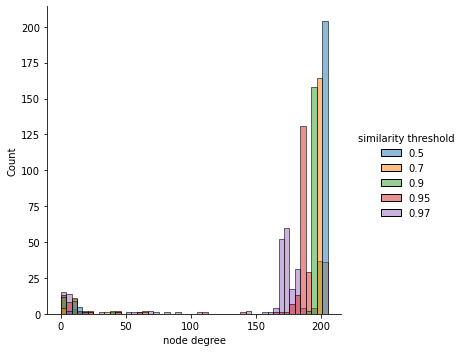

In [268]:
sns.displot(all_node_degrees_df, x="node degree", hue="similarity threshold",palette=sns.color_palette("tab10")[0:5])
plt.savefig('graph_visualizations/node_degrees.pdf')

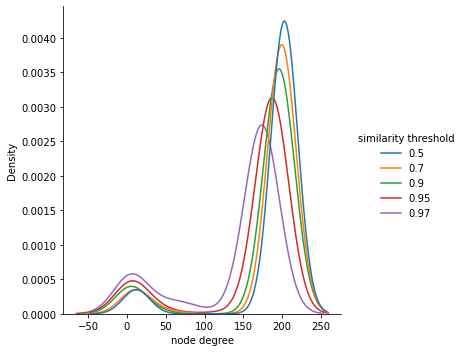

In [269]:
sns.displot(all_node_degrees_df, x="node degree",  kind="kde", hue="similarity threshold",palette=sns.color_palette("tab10")[0:5])

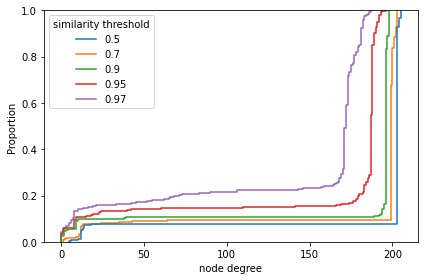

In [270]:
sns.ecdfplot(all_node_degrees_df, x="node degree", hue="similarity threshold",palette=sns.color_palette("tab10")[0:5])
plt.tight_layout()
plt.savefig('graph_visualizations/node_degree_distributions.pdf')